## Instalar OpenCV

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Rotar una imagen

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
img = cv2.imread("img/1.jpg")

In [13]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

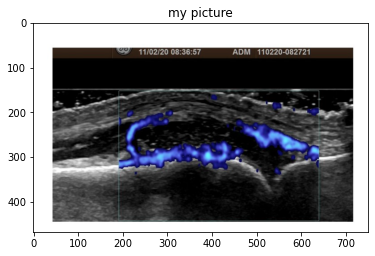

In [19]:
#cv2.imshow('Original Image', img) 
#cv2.waitKey(0)
plt.imshow(img)
plt.title('my picture')
plt.show()


In [15]:
height, width = img.shape[0:2]
print(height)
print(width)

468
750


In [16]:
#cv2.getRotationMatrix2D(center, angle, scale)
rotationMatrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

In [17]:
rotatedImage = cv2.warpAffine(img, rotationMatrix, (width, height))
cv2.imshow('Rotated Image', rotatedImage)

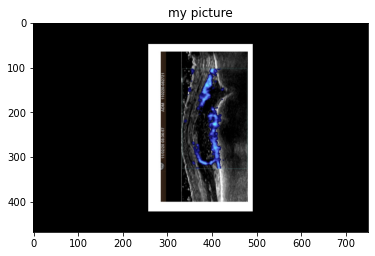

In [20]:
plt.imshow(rotatedImage)
plt.title('my picture')
plt.show()

## Recortar una imagen

In [21]:
height, width = img.shape[0:2]

startRow = int(height*.15)

startCol = int(width*.15)

endRow = int(height*.85)

endCol = int(width*.85)

In [22]:
croppedImage = img[startRow:endRow, startCol:endCol]

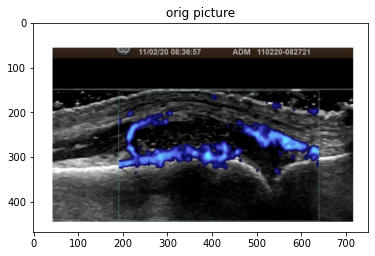

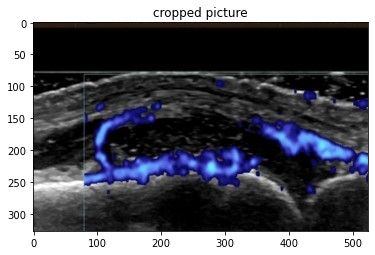

In [23]:
plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(croppedImage)
plt.title('cropped picture')
plt.show()


## Cambiar el tamaño de una imagen

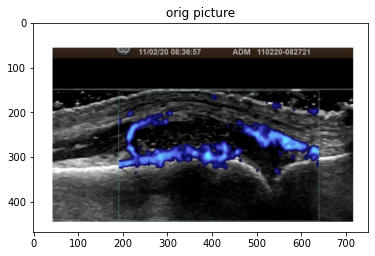

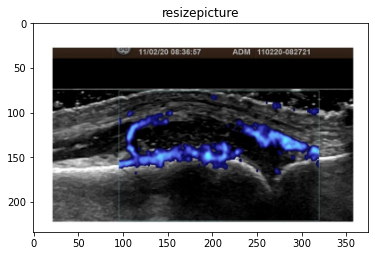

In [29]:
newImg = cv2.resize(img, (0,0), fx=0.5, fy=0.5)

plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(newImg)
plt.title('resizepicture')
plt.show()

## Ajustar el Contraste

En el módulo OpenCV de Python no hay una función particular para ajustar el contraste de la imagen,
pero la documentación oficial de OpenCV sugiere una ecuación que puede realizar el brillo 
y el contraste de la imagen al mismo tiempo.
#### new_img = a * original_img + b

Aquí a es alfa que define el contraste de la imagen. Si a es mayor que 1, habrá un mayor contraste.
Si el valor de a está entre 0 y 1 (menor que 1 pero mayor que 0), habrá menor contraste. Si a es 1,
no habrá efecto de contraste en la imagen.

b significa beta. Los valores de b varían de -127 a +127.

Para implementar esta ecuación en Python OpenCV, puedes usar el método addWeighted(). Usamos el método addWeighted() ya que genera la salida en el rango de 0 y 255 para una imagen en color de 24 bits.
#### cv2.addWeighted(source_img1, alpha1, source_img2, alpha2, beta)

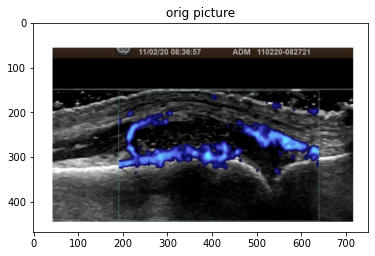

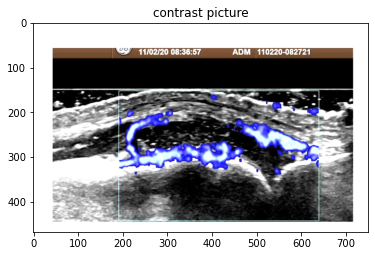

In [31]:
contrast_img = cv2.addWeighted(img, 2.5, np.zeros(img.shape, img.dtype), 0, 0)
plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(contrast_img)
plt.title('contrast picture')
plt.show()

## Hacer una imagen borrosa

### Borrón Gaussiano

El GaussianBlur() utiliza el núcleo Gaussiano. La altura y el ancho del kernel deben ser un número positivo e impar.

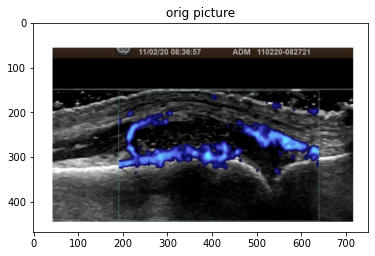

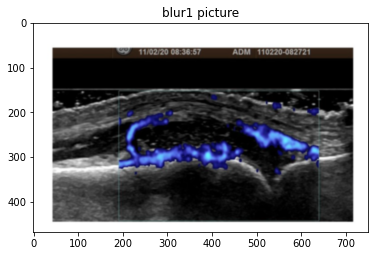

In [39]:
blur_image = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(blur_image)
plt.title('blur1 picture')
plt.show()


### Median Blur

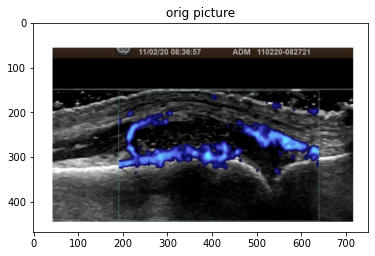

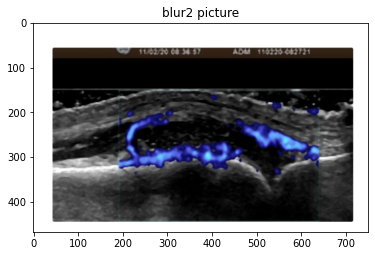

In [40]:
#Esto aplicará un 50% de ruido en la imagen junto con el desenfoque medio. Ahora muestre las imágenes:
blur2_image = cv2.medianBlur(img,5)
plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(blur2_image)
plt.title('blur2 picture')
plt.show()

## Detectar los bordes

La sintaxis de Canny() es la siguiente:
cv2.Canny(image, minVal, maxVal)
Aquí minVal y maxVal son los valores de gradiente de intensidad mínimo y máximo respectivamente.


In [53]:
edge_img = cv2.Canny(img,10,300)

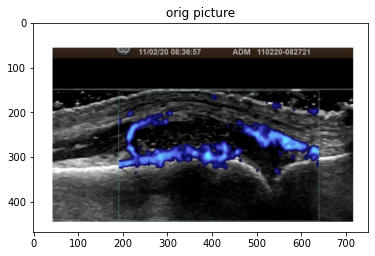

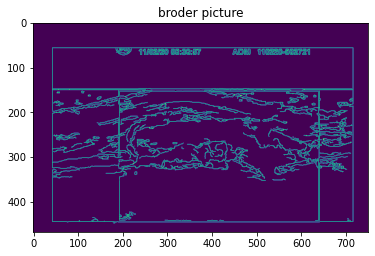

In [54]:
plt.imshow(img)
plt.title('orig picture')
plt.show()

plt.imshow(edge_img)
plt.title('broder picture')
plt.show()

## cambiarla a gris

In [63]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


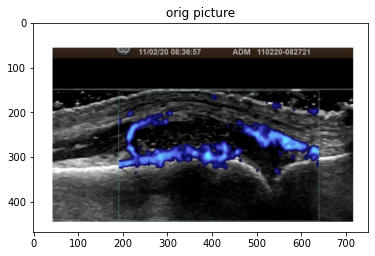

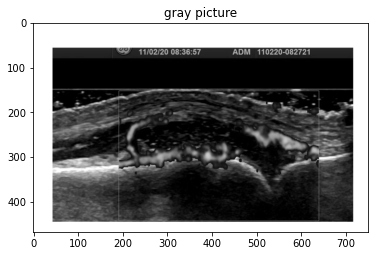

In [64]:
plt.imshow(img)
plt.title('orig picture')
plt.show()


plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)
plt.title('gray picture')
plt.show()

## Extracción de texto de la imagen (OCR)


In [93]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [94]:
import pytesseract
pytesseract.image_to_string(img)


PermissionError: [Errno 13] Permission denied: '/Users/eduardoblanco/Library/Caches/pip/wheels/7f/a1/69/fabe07004553a36d818e4657fed410daf525fe1ae161f469d3'

##  Detección de color


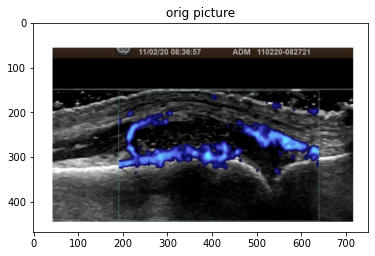

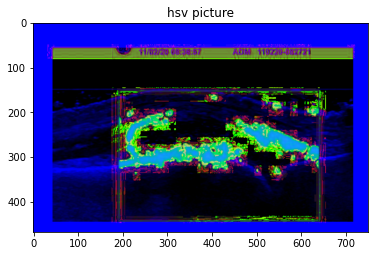

In [95]:
# conviértala en HSV usando cvtColor()
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img)
plt.title('orig picture')
plt.show()


plt.imshow(hsv_img, cmap='gray', vmin = 0, vmax = 255)
plt.title('hsv picture')
plt.show()

In [96]:
# Ahora cree una matriz NumPy para los valores verdes inferiores y los valores verdes superiores:
lower_green = np.array([34, 177, 76])

upper_green = np.array([255, 255, 255])

In [97]:
# Utilice el método inRange() de cv2 para comprobar si los elementos de la matriz de imágenes dados se encuentran entre
#los valores de la matriz de los límites superiores e inferiores:
masking = cv2.inRange(hsv_img, lower_green, upper_green)


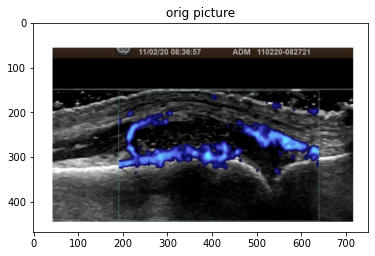

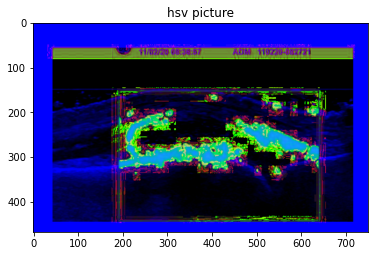

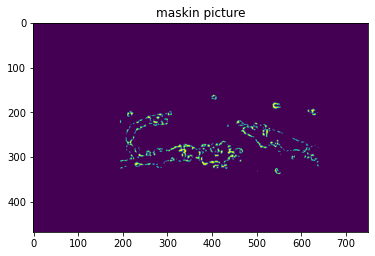

In [98]:
plt.imshow(img)
plt.title('orig picture')
plt.show()


plt.imshow(hsv_img, cmap='gray', vmin = 0, vmax = 255)
plt.title('hsv picture')
plt.show()

plt.imshow(masking)
plt.title('maskin picture')
plt.show()

## Reducir el ruido


Para reducir el ruido de una imagen, OpenCV proporciona los siguientes métodos:

fastNlMeansDenoising(): Elimina el ruido de una imagen en escala de grises

fastNlMeansDenoisingColored(): Elimina el ruido de una imagen coloreada

fastNlMeansDenoisingMulti(): Elimina el ruido de los marcos de imagen en escala de grises (un vídeo en escala de grises)

fastNlMeansDenoisingColoredMulti(): Igual que el 3 pero funciona con marcos de color

Usemos fastNlMeansDenoisingColored() en nuestro ejemplo:

In [107]:
result = cv2.fastNlMeansDenoisingColored(img,None,20,10,7,21)


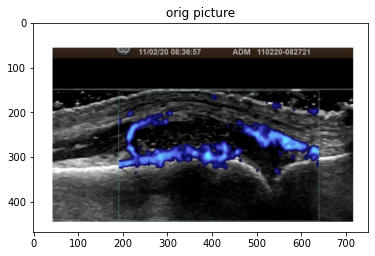

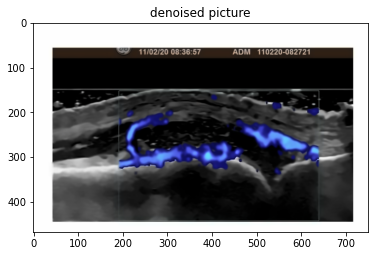

In [108]:
plt.imshow(img)
plt.title('orig picture')
plt.show()


plt.imshow(result)
plt.title('denoised picture')
plt.show()